e:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
e:\anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


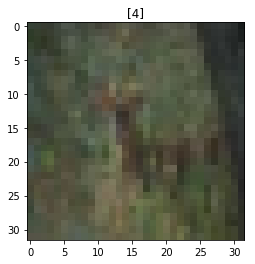

In [1]:
from keras.datasets import cifar10 #图像识别
import matplotlib.pyplot as plt
%matplotlib inline
(x_train,y_train),(x_test,y_test) = cifar10.load_data() #加载数据
plt.imshow(x_train[10])
plt.title(str(y_train[10]))
plt.show()

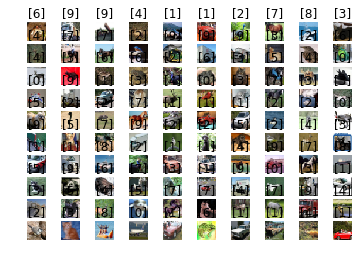

In [2]:
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i]) #显示图片
    plt.title(str(y_train[i])) #显示标题
    plt.axis("off")
plt.show()

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential #神经网络对象
from keras.layers import Dense,Dropout,Flatten,Activation #神经网络参数
from keras.layers.convolutional import Conv2D,MaxPooling2D #卷积神经网络
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from keras.layers import Convolution2D,MaxPooling2D,AveragePooling2D
from keras.optimizers import SGD

(x_train,y_train),(x_test,y_test) = cifar10.load_data() #加载数据
x_train = x_train.astype("float32") #数据类型转换
x_test = x_test.astype("float32")
x_train/=255 #像素0-255之间，0-1之间
x_test/=255
print("  ",x_train.shape,x_test.shape)
print("  ",y_train.shape,y_test.shape)

   (50000, 32, 32, 3) (10000, 32, 32, 3)
   (50000, 1) (10000, 1)


In [6]:
num_classes=10
y_train = np_utils.to_categorical(y_train,num_classes=num_classes) #数据分类
y_test = np_utils.to_categorical(y_test,num_classes=num_classes)
print("  CNN  卷积神经网络")
model = Sequential() #构建一个模型
# cnn第一个c1卷积层
model.add(Convolution2D(32,3,3,border_mode="valid",input_shape=x_train.shape[1:]))
model.add(Activation("relu")) #激活函数
# c2
model.add(Convolution2D(32,3,3))
model.add(Activation("relu")) #激活函数

model.add(MaxPooling2D(pool_size=(2,2))) #筛选图像
model.add(Dropout(0.25)) #放弃0.25
# c3
model.add(Convolution2D(64,3,3,border_model="valid"))
model.add(Activation("relu")) #激活函数
# c4
model.add(Convolution2D(64,3,3))
model.add(Activation("relu")) #激活函数

model.add(MaxPooling2D(pool_size=(2,2))) #筛选图像
model.add(Dropout(0.25)) #放弃0.25

model.add(Flatten())
model.add(Dense(512)) #512个神经元
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(num_classes)) #输出识别结果
model.add(Activation("softmax")) #分类结果
model.summary()
print("  cnn模型构造成功")
sgd = SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss="categorical_crossentropy", #损失函数
              optimizer=sgd, #优化参数
              metrics=["accuracy"])
model.fit(x_train,y_train,batch_size=100,nb_epoch=50,
          validation_data=(x_test,y_test)) #训练
y_new = model.predict(x_test)
print("  预测数据",y_new)
score = model.evaluate(x_test,y_est,verbose=0) #得分
print("  损失系数",score[0],"精确度",score[1])

  CNN  卷积神经网络


e:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="valid")`
  import sys
e:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'Convlution2D' is not defined